![Foodtruck](images/ex_octave_1_foodtruck_linear_regression.jpeg)

# Linear Regression analysis using Octave: Food Truck

In this example, we are performing linear regression algorithm with one variable to predict profits for a food truck. 

As CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. 

In [9]:
%% Initialization
clear all; close all; clc

addpath ("../code/octave/linear_regression_foodtruck/")

%% ======== Load CSV File ========
data = dlmread("../datasets/food_truck_data.csv", ",");

%% ======== Display first 5 rows ========
disp(data(1:5, :))

    6.1101   17.5920
    5.5277    9.1302
    8.5186   13.6620
    7.0032   11.8540
    5.8598    6.8233


Plotting Data ...


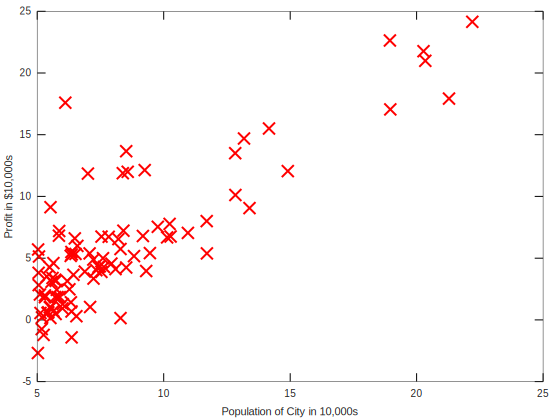

In [10]:
%% ======================= Part 1: Plotting =======================

X = data(:, 1); 
y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
fprintf('Plotting Data ...\n')
plot(X, y, 'rx');
ylabel('Profit in $10,000s'); % Set the y−axis label
xlabel('Population of City in 10,000s'); % Set the x−axis label

In [11]:
%% =================== Part 2: Gradient descent ===================
fprintf('Running Gradient Descent ...\n')

X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

% compute and display initial cost
computeCost(X, y, theta)

% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent: \n');
fprintf('%f %f \n', theta(1), theta(2));

Running Gradient Descent ...
ans =  32.073
 4.4834
Theta found by gradient descent: 
-3.630291 1.166362 
Theta found by gradient descent: 


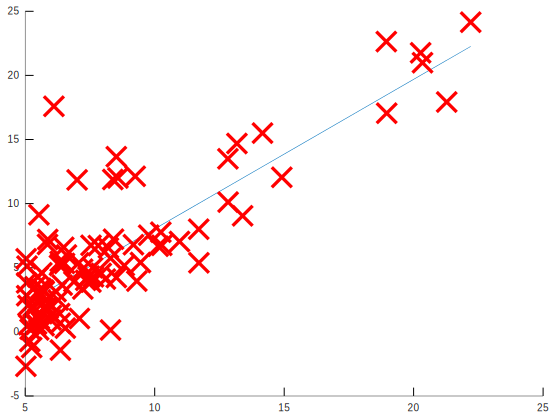

In [13]:
% Plot the linear fit
hold on; % keep previous plot visible

plot(X(:,2), X*theta, '-', X(:,2), y, 'rx', 'MarkerSize', 10)
hold off % don't overlay any more plots on this figure

In [14]:
% Predict values for population size of 35,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of $%d\n',...
    int32(predict1*10000));

% Predict values for population size of 150,000
predict2 = [1, 15] * theta;
fprintf('For population = 150,000, we predict a profit of $%d\n',...
    int32(predict2*10000));

For population = 35,000, we predict a profit of $4520
For population = 150,000, we predict a profit of $138651


Visualizing J(theta_0, theta_1) ...


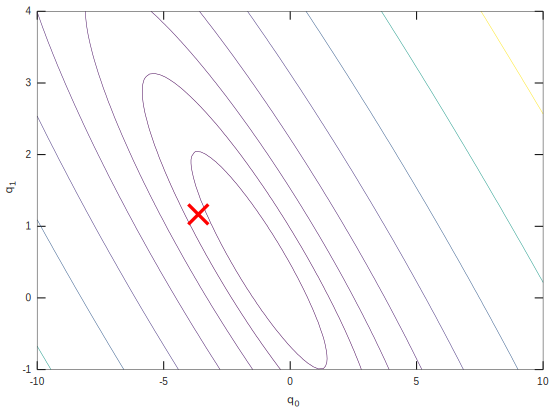

In [5]:
%% ============= Part 3: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];    
	  J_vals(i,j) = computeCost(X, y, t);
    end
end

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);


In [7]:
% Because of the way meshgrids work in the surf command, we need to 
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');